# Asociación de reactores

Ejemplo sacado de: Levenspiel, O. (1999). Chemical reaction engineering (3rd ed). Wiley.

In [1]:
import os

In [2]:
FOLDER = "comparacion_reactor"

In [3]:
os.makedirs(FOLDER, exist_ok=True)

Generamos la curva arbitraria que representa $-\frac{1}{r}$ vs $X$, es decir, el inverso aditivo y multiplicativo de la velocidad de reacción en función de la conversión de reactivo limitante.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.linspace(0, 1)

def inv_r(x):
    return np.power(x + 0.2, 2.5) + 0.1

In [6]:
def plot_curve():
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(X, inv_r(X))
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.8)
    ax.set_xlabel(r"$X$", fontsize=14)
    ax.set_ylabel(r"$\frac{-1}{r}$", fontsize=14)
    ax.tick_params(labelleft=False)
    
    return fig, ax

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:xlabel='$X$', ylabel='$\\frac{-1}{r}$'>)

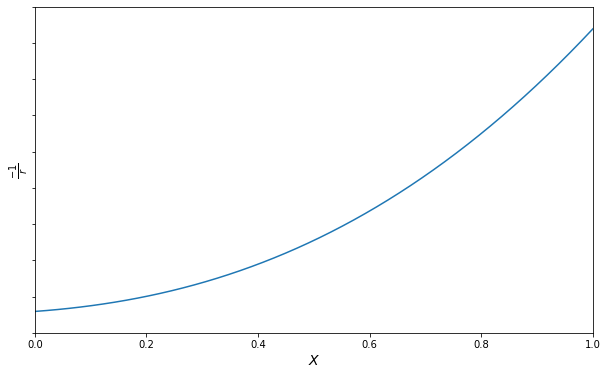

In [7]:
plot_curve()

## Asociación de dos reactores $V_{1} < V_{2}$

Definimos las variables a usar $X_{1}$ como la conversión del reactor 1 y $X_{2}$ como la conversión del reactor 2 (en función de la entrada):

In [8]:
X_1 = 0.2
X_2 = 0.9

Graficamos el área que representa la razón:
$$
\frac{V_{i}}{F_{0}}
$$

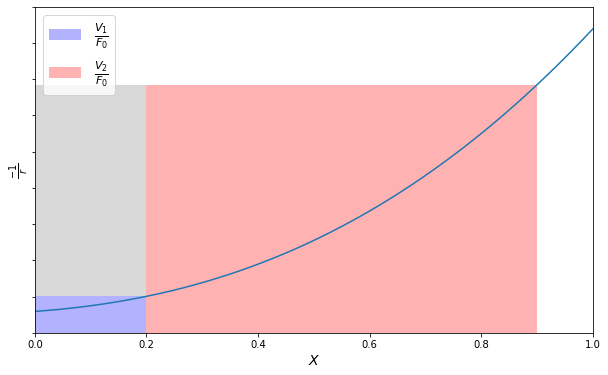

In [9]:
fig, ax = plot_curve()

ax.fill_between([0, X_1], 0, inv_r(X_1), facecolor="blue", alpha=0.3, label=r"$\frac{V_{1}}{F_{0}}$")
ax.fill_between([X_1, X_2], 0, inv_r(X_2), facecolor="red", alpha=0.3, label=r"$\frac{V_{2}}{F_{0}}$")
ax.fill_between([0, X_1], inv_r(X_1), inv_r(X_2), facecolor="gray", alpha=0.3)
ax.legend(fontsize=16)
fig.savefig(os.path.join(FOLDER, "asociacion_reactores_1.png"))

## Asociación de dos reactores $V_{1} > V_{2}$

Repetimos el ejercicio anterior, pero esta vez el primer reactor será más pequeño

In [10]:
X_1 = 0.6
X_2 = 0.9

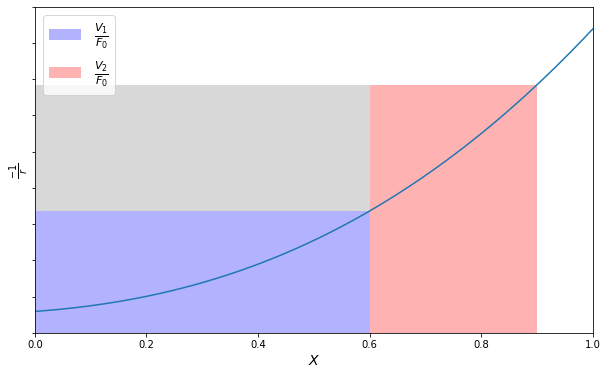

In [11]:
fig, ax = plot_curve()

ax.fill_between([0, X_1], 0, inv_r(X_1), facecolor="blue", alpha=0.3, label=r"$\frac{V_{1}}{F_{0}}$")
ax.fill_between([X_1, X_2], 0, inv_r(X_2), facecolor="red", alpha=0.3, label=r"$\frac{V_{2}}{F_{0}}$")
ax.fill_between([0, X_1], inv_r(X_1), inv_r(X_2), facecolor="gray", alpha=0.3)
ax.legend(fontsize=16)
fig.savefig(os.path.join(FOLDER, "asociacion_reactores_2.png"))

## Asociación de tres reactores

Esta vez los reactores serán:

- **CSTR** $V_{1} < V_{3}$
- **PFR**
- **CSTR** $V_{3} > V_{1}$

In [12]:
X_1 = 0.5
X_2 = 0.6
X_3 = 0.9

Esta vez, solo los reactores **CSTR** ocupan el rectángulo para la relación $\frac{V_{i}}{F_{0}}$, el segundo reactor (**PFT**) será el área bajo la curva

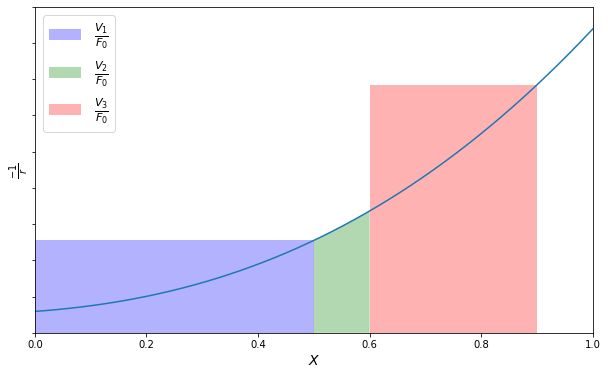

In [13]:
fig, ax = plot_curve()

ax.fill_between([0, X_1], 0, inv_r(X_1), facecolor="blue", alpha=0.3, label=r"$\frac{V_{1}}{F_{0}}$")

curve = np.linspace(X_1, X_2)

ax.fill_between(curve, 0, inv_r(curve), facecolor="green", alpha=0.3, label=r"$\frac{V_{2}}{F_{0}}$")
ax.fill_between([X_2, X_3], 0, inv_r(X_3), facecolor="red", alpha=0.3, label=r"$\frac{V_{3}}{F_{0}}$")

ax.legend(fontsize=16)
fig.savefig(os.path.join(FOLDER, "asociacion_reactores_3.png"))